Episode 0


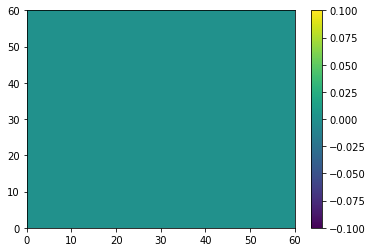

Episode 20


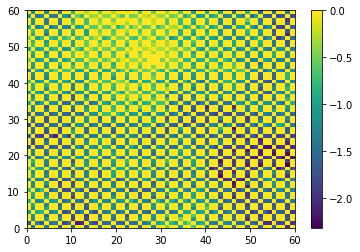

Episode 40


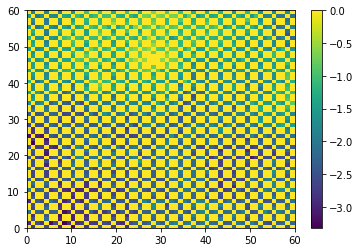

Episode 60


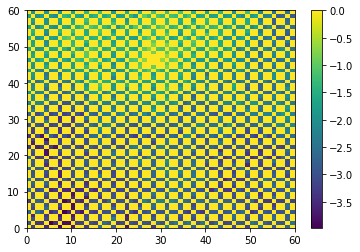

Episode 80


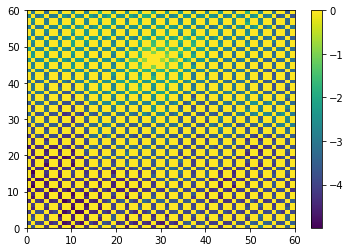

Episode 100


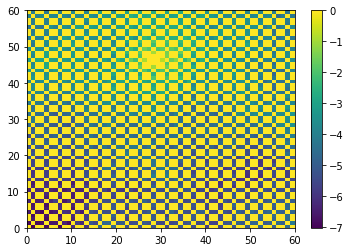

Episode 120


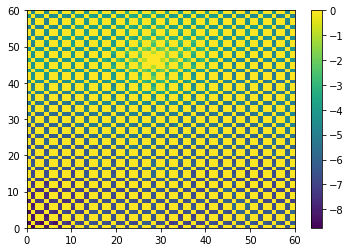

Episode 140


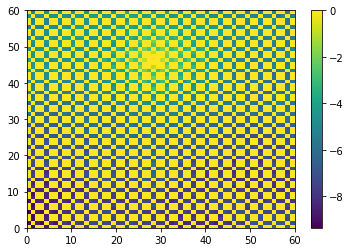

Episode 160


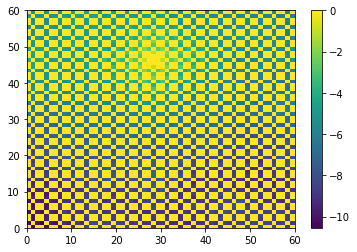

Episode 180


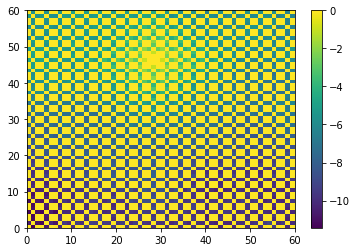

Reached max number of episodes: 200
Episode 200


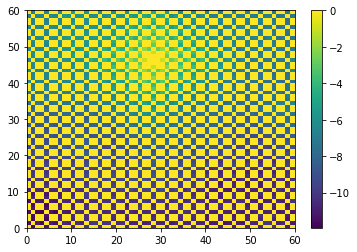

In [4]:
% matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from myelin.agents import QLearning
from myelin.core import RLInteraction, MDPEnvironment
from myelin.core.termination import MaxEpisodes
from myelin.mdps import GridWorld
from myelin.policies import RandomPolicy
from myelin.utils import Callback

ROWS, COLS = 20, 20
CELL_SIZE = 3

mdp = GridWorld(ROWS, COLS)
env = MDPEnvironment(mdp)
policy = RandomPolicy(env.action_space)


class GridWorldQFunction:
    def __init__(self):
        self._table = np.zeros((ROWS * CELL_SIZE, COLS * CELL_SIZE))

    def __setitem__(self, key, value):
        state, action = key
        key_ = tuple((np.array(state) * CELL_SIZE) + 1 + np.array(action))
        self._table[key_] = value

    def __getitem__(self, key):
        state, action = key
        key_ = tuple((np.array(state) * CELL_SIZE) + 1 + np.array(action))
        return self._table[key_]


qf = GridWorldQFunction()
agent = QLearning(policy, qf)


def display():
    np.set_printoptions(precision=4, linewidth=200)
    plt.pcolormesh(qf._table)
    plt.colorbar()
    plt.show()


class LearningMonitor(Callback):
    def on_episode_begin(self, episode):
        if episode % 20 == 0:
            print('Episode {}'.format(episode))
            display()

    def on_interaction_end(self, episode):
        print('Episode {}'.format(episode))
        display()


RLInteraction(
    env=env,
    agent=agent,
    callbacks=[LearningMonitor()],
    termination_conditions=[MaxEpisodes(n_episodes=200)]
).start()
